#AG3 - Actividad Guiada 3

**Nombre:** Alejandro Ciriano

**Cuaderno:**  https://drive.google.com/file/d/1292o1sTmBJ68ucSIINn137knMmot7Rn3/view?usp=sharing

**Repositorio**: https://github.com/aciriano/optimization/blob/main/AG3.ipynb


#Carga de librerias

In [1]:
!pip install requests
!pip install tabulate>=0.9 networkx>=3.0
!pip install tsplib95 --no-deps
!pip install deprecated

#Carga de los datos del problema

In [2]:

import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
#urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file + '.gz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file  )
#!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)


#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/




('swiss42.tsp', <http.client.HTTPMessage at 0x7f03e41162d0>)

In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [4]:
Nodos

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [5]:
Aristas
# https://github.com/mastqe/tsplib/blob/master/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



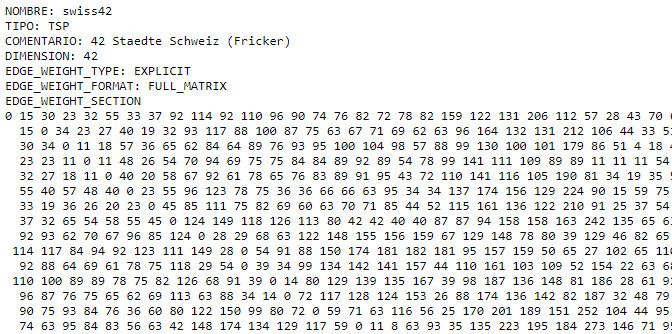

In [6]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [7]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 28, 17, 14, 23, 35, 25, 26, 29, 4, 24, 18, 20, 8, 33, 2, 38, 15, 27, 36, 41, 21, 5, 37, 19, 40, 12, 3, 1, 13, 34, 7, 6, 16, 32, 10, 31, 30, 39, 11, 22, 9]
5256


#BUSQUEDA ALEATORIA

In [8]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 5000)

Mejor solución: [0, 32, 22, 4, 18, 12, 34, 21, 8, 17, 36, 37, 31, 33, 20, 13, 19, 26, 6, 11, 28, 27, 10, 41, 16, 5, 2, 3, 39, 23, 38, 24, 25, 40, 1, 30, 15, 14, 7, 9, 29, 35]
Distancia     : 3748


#BUSQUEDA LOCAL

In [9]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3748
Distancia Mejor Solucion Local: 3502


In [10]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  36 , la mejor solución encontrada es: [0, 1, 6, 26, 18, 12, 11, 5, 7, 17, 36, 35, 33, 34, 20, 31, 19, 13, 4, 2, 28, 30, 29, 8, 10, 25, 41, 23, 9, 21, 40, 24, 39, 22, 38, 32, 37, 15, 16, 14, 3, 27]
Distancia     : 1687


#SIMULATED ANNEALING


In [11]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [12]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 38, 22, 39, 40, 24, 21, 23, 41, 25, 12, 11, 29, 34, 33, 35, 36, 37, 15, 16, 7, 1, 32, 28, 26, 5, 6, 4, 17, 31, 20, 30, 9, 8, 10, 18, 13, 19, 14, 3, 2, 27]
con una distancia total de 1959


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


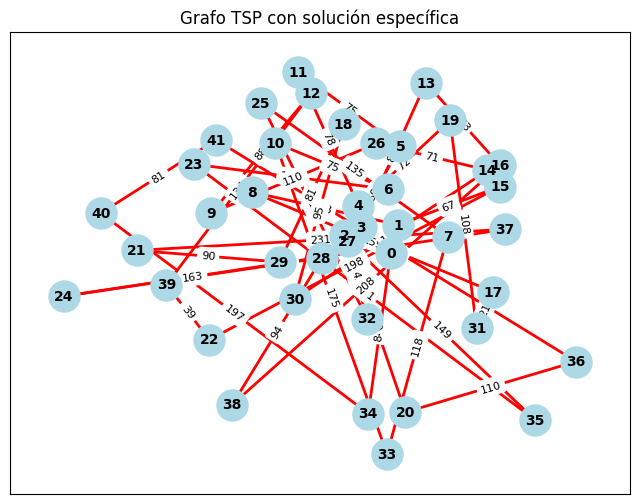

In [14]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

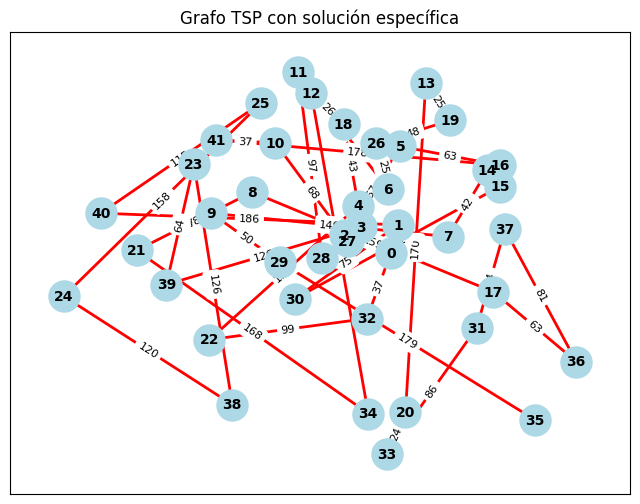

In [15]:
plot_tsp_solution(problem.edge_weights, solucion)

# Extra: Búsqueda local por entornos variables

En la siguiente celda se han creado dos operadores de vecindad. El primero, `reorder_solution`, se encarga de intercambiar $n$ valores de una solución entre sí, escogiendo el orden de intercambio aleatoriamente. El segundo, `rotate_solution`, escoge un índice de la solución aleatoriamente, la separa en dos mitades e intercambia el orden de los puntos (la rota respecto al punto escogido).

Con ambas funciones se ha tratado de implementar una búsqueda local `n-opt`, pero incluyendo una probabilidad no nula de, en vez de realizar intercambios, aplicar una rotación. El proceso se desarrolla en la función `improve_with_n_opt`, y es tal que así:
1. Para cada $i=1, \dots ,\text{NeighSize}$, calcular un nuevo vecino con $n$ intercambios o con rotación (escoger de manera aleatoria).
2. Si la solución es mejor que la actual, actualizarla e iniciar de nuevo el paso 1.
3. En caso contrario, si no se ha encontrado un vecino mejor, ejecutar recursivamente el proceso con la mejor solución encontrada y un número de intercambios de $n-1$.
4. Repetir 1-2-3 hasta que no haya mejores soluciones y hasta que $n=2$.


Partiendo de la mejor solución encontrada a lo largo del cuaderno, y ejecutándolo iterativamente (ver celdas), se ha encontrado la solución
_[30, 38, 22, 39, 21, 24, 40, 23, 41, 9, 29, 32, 34, 33, 20, 35, 36, 37, 15, 14, 7, 0, 1, 6, 5, 13, 19, 16, 17, 31, 27, 2, 8, 10, 25, 11, 12, 18, 26, 4, 3, 28]_, cuya distancia es **1555**.

In [16]:
from typing import Callable
from itertools import permutations

from tsplib95.models import Problem

TspSolution = list[int]
Neighbourhood = list[TspSolution]

# Random configuration. Required to replicate the experiments.
SEED = 95432
random.seed(SEED)

# Reload the tsp instance data.
my_tsp = tsplib95.load(file)

# Variable to refer to the best previous solution.
best_solution = sol


def reorder_solution(solution: TspSolution, changes: int) -> TspSolution:
    # First, we choose the n numbers to swap.
    indices = random.sample(population=range(len(solution)), k=changes)

    # Next, we extract the values and we shuffle them in order to make the
    # permutation random.
    values = [solution[i] for i in indices]
    random.shuffle(values)

    # We make a copy of the original solution and we apply the changes.
    out = solution.copy()
    for i, idx in enumerate(indices):
        out[idx] = values[i]
    return out


def rotate_solution(solution: TspSolution) -> TspSolution:
    point = random.randint(a=1, b=len(solution)-2)
    return solution[point:] + solution[:point]


def improve_with_n_opt(
        solution: TspSolution,
        problem: Problem,
        n: int,
        neigh_size: int = 1000,
        p_rotate: float = 0.2
        ) -> TspSolution:
    for _ in range(neigh_size):
        # We create a new solution -> rotation or permutation.
        if random.random() < p_rotate:
            new_solution = rotate_solution(solution)
        else:
            new_solution = reorder_solution(solution=solution, changes=n)

        # We evaluate the new solution. If it improves the current distance,
        # the process is launched again starting on the current n-value.
        if distancia_total(new_solution, problem) < distancia_total(solution, problem):
            solution = new_solution
            return improve_with_n_opt(solution, problem, n, neigh_size, p_rotate)

    # If n equals 2, we return the new solution. Otherwise, we make a recursive
    # call with a smaller value of n.
    if n == 2:
        return solution
    else:
        return improve_with_n_opt(solution, problem, n-1, neigh_size, p_rotate)


In [17]:
n_opt_solution = improve_with_n_opt(solution=best_solution, problem=my_tsp, n=10, neigh_size=1000, p_rotate=0.1)

assert len(set(n_opt_solution)) == len(n_opt_solution), sorted(n_opt_solution)

print(f"La nueva mejor solución es: {n_opt_solution}.")
print(f"Distancia: {distancia_total(n_opt_solution, problem)}.")

La nueva mejor solución es: [30, 38, 22, 39, 21, 24, 40, 23, 41, 10, 2, 32, 34, 33, 20, 35, 36, 37, 15, 14, 7, 0, 1, 6, 5, 13, 19, 16, 17, 31, 28, 29, 9, 8, 25, 11, 12, 18, 26, 4, 3, 27].
Distancia: 1596.


In [18]:
# Podemos repetir el proceso iterativamente (y ejecutar varias veces la celda).
for _ in range(10):
    n_opt_solution = improve_with_n_opt(solution=n_opt_solution, problem=my_tsp, n=10, neigh_size=1000,  p_rotate=0.1)

print(f"La nueva mejor solución es: {n_opt_solution}.")
print(f"Distancia: {distancia_total(n_opt_solution, my_tsp)}.")

La nueva mejor solución es: [30, 38, 22, 39, 21, 24, 40, 23, 41, 9, 29, 32, 34, 33, 20, 35, 36, 37, 15, 14, 7, 0, 1, 6, 5, 13, 19, 16, 17, 31, 27, 2, 8, 10, 25, 11, 12, 18, 26, 4, 3, 28].
Distancia: 1555.


# Extra: Mejora de `genera_vecina`


En esta sección vamos a sustituir la función `genera_vecina`, utilizada previamente en el recocido simulado, para que, en vez de permutar dos puntos aleatorios de la solución, seleccione entre los $n$ mejores vecinos alcanzados a través de `2-opt`.


Como resultado, se ha encontrado la solución _[30, 38, 22, 39, 21, 24, 40, 23, 41, 9, 29, 32, 34, 33, 20, 35, 36, 31, 17, 37, 15, 16, 14, 19, 13, 5, 6, 1, 7, 0, 3, 2, 8, 10, 25, 11, 12, 18, 26, 4, 27, 28]_, cuya distancia es **1421**.

In [24]:
from typing import Generator


def all_2_opt_neighbors(solution: TspSolution) -> Generator[None, None, TspSolution]:
    for i in range(1, len(solution) - 1):
        for j in range(i + 1, len(solution)):
            out = solution.copy()
            out[j], out[i] = solution[i], solution[j]
            yield out


def get_neighbor_solution(solution: TspSolution, problem: Problem, candidates: int) -> TspSolution:
    best = []
    for neighbor in all_2_opt_neighbors(solution): # N * N / 2
        d_neighbor = distancia_total(neighbor, problem)
        if len(best) < candidates:
            best.append((neighbor, d_neighbor))
        else:
            if d_neighbor < best[-1][1]:
                best.pop(-1)
                best.append((neighbor, d_neighbor))

        best.sort(key=lambda x: x[1], reverse=False)

    return random.choice(best)[0]

In [25]:
def simulated_annealing(
        solution: TspSolution,
        problem: Problem,
        temp: int,
        candidates: int = 6
        ) -> TspSolution:
    ref_solution = solution
    ref_distance = distancia_total(solution, problem)

    best_solution = []
    best_distance = float("inf")

    N=0
    while temp > .0001:
        N+=1
        #Genera una solución vecina
        neighbor = get_neighbor_solution(ref_solution, problem, candidates=candidates)

        #Calcula su valor(distancia)
        neigh_distance = distancia_total(neighbor, problem)

        #Si es la mejor solución de todas se guarda(siempre!!!)
        if neigh_distance < best_distance:
            best_solution = neighbor
            best_distance = neigh_distance

        if neigh_distance < ref_distance or probabilidad(temp, abs(ref_distance - neigh_distance)):
            #solucion_referencia = copy.deepcopy(vecina)
            ref_solution = neighbor
            ref_distance = neigh_distance

        #Bajamos la temperatura
        temp = bajar_temperatura(temp)

    return best_solution

In [26]:
final_solution = simulated_annealing(
    solution=n_opt_solution,
    problem=my_tsp,
    temp=10000000,
    candidates=6
)

print(f"La solución final es: {final_solution}.")
print(f"Distancia: {distancia_total(final_solution, my_tsp)}.")

La solución final es: [30, 38, 22, 39, 21, 24, 40, 23, 41, 9, 29, 32, 34, 33, 20, 35, 36, 31, 17, 37, 15, 16, 14, 19, 13, 5, 6, 1, 7, 0, 3, 2, 8, 10, 25, 11, 12, 18, 26, 4, 27, 28].
Distancia: 1421.
